Analisis de Datos

Cindy Patricia Ureche Lopez

Grupo 202016908_91

Tarea 5

In [5]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

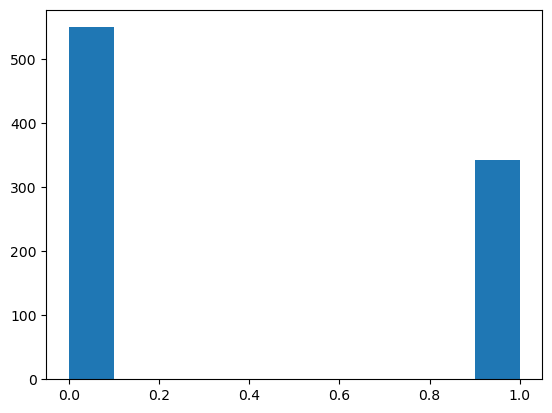

In [18]:
plt.hist(data.Survived)

<Axes: xlabel='Age', ylabel='Fare'>

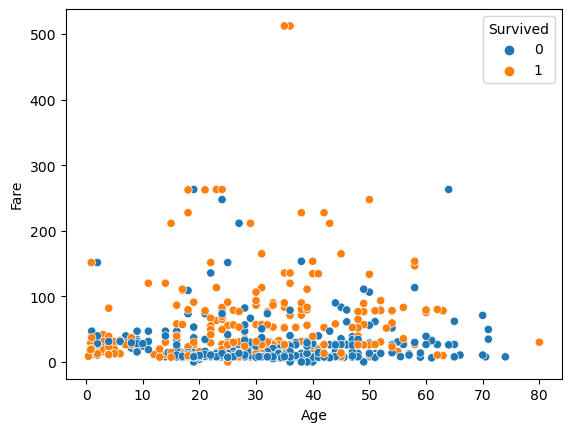

In [25]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)

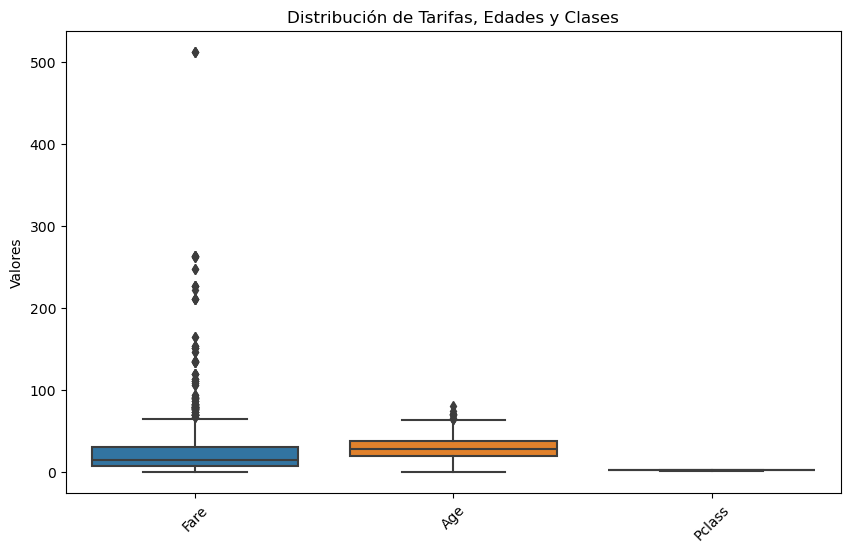

In [28]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  
sns.boxplot(data=data[['Fare', 'Age', 'Pclass']])
plt.xticks(rotation=45)
plt.title('Distribución de Tarifas, Edades y Clases') 
plt.ylabel('Valores')
plt.show()

In [46]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [60]:
predictors_col = ['Age','Survived','PassengerId','Pclass','Fare']  # Características independientes
target_col = 'Survived' 

In [62]:
predictors = data[predictors_col]
target = data[target_col]

In [64]:
predictors

,Age,Survived,PassengerId,Pclass,Fare
0,22.0,0,1,3,7.2500
1,38.0,1,2,1,71.2833
2,26.0,1,3,3,7.9250
3,35.0,1,4,1,53.1000
4,35.0,0,5,3,8.0500
...,...,...,...,...,...
886,27.0,0,887,2,13.0000
887,19.0,1,888,1,30.0000
888,NaN,0,889,3,23.4500
889,26.0,1,890,1,30.0000


In [66]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [68]:
corr = predictors.corr()
corr

,Age,Survived,PassengerId,Pclass,Fare
Age,1.000000,-0.077221,0.036847,-0.369226,0.096067
Survived,-0.077221,1.000000,-0.005007,-0.338481,0.257307
PassengerId,0.036847,-0.005007,1.000000,-0.035144,0.012658
Pclass,-0.369226,-0.338481,-0.035144,1.000000,-0.549500
Fare,0.096067,0.257307,0.012658,-0.549500,1.000000


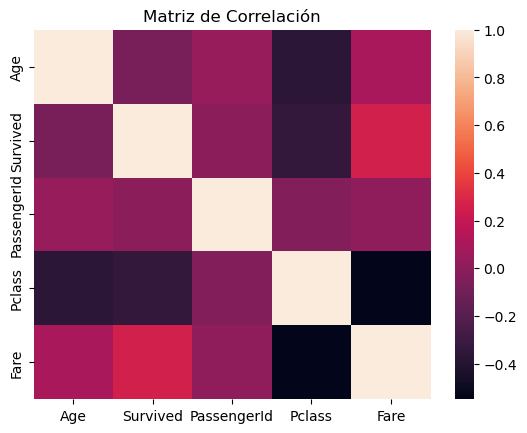

In [70]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [74]:
tree = DecisionTreeClassifier()

In [76]:
arbol = tree.fit(X_train, y_train)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.4, 0.5, 'x[2] <= 624.5\ngini = 0.365\nsamples = 444\nvalue = [444, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 304\nvalue = [304, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 140\nvalue = [140, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 268\nvalue = [0, 268]')]

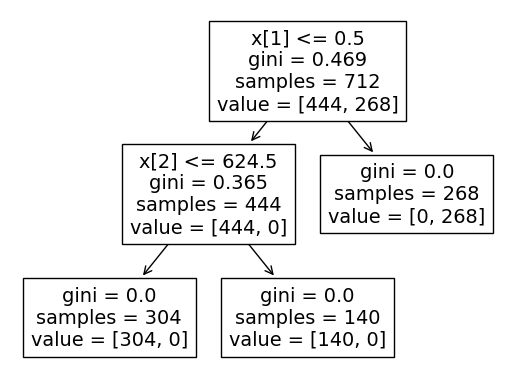

In [78]:
plot_tree(arbol)

In [80]:
predicciones = arbol.predict(X_test)

In [82]:
predicciones

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [88]:
# Examinamos la matriz de confusión
pd.crosstab(
    y_test,  # Usa y_test directamente
    predicciones, 
    rownames=['Actual'], 
    colnames=['Predicciones']
)

Predicciones,0,1
Actual,,
0,105,0
1,0,74


In [91]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0

In [93]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [95]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

1.0

In [97]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

1.0